## Теоретическое описание метода неопределенных коэффициентов и его программная реализация

Пусть в одномерной области $[x_{min}, x_{max}]$ задана равномерная сетка из $N = m + l + 1$ узлов (Равномерная сетка - сетка, расстояние между двумя любыми соседними узлами которой равно постоянному h, где h - сеточный шаг). На этой области определена бесконечно непрерывно дифференцируемая ф-я $f$. Известны значения этой ф-и во всех узлах рассматриваемой сетки $\{f_i\}_{i=0}^N$ (говорять, что определена сеточная ф-я - проекция ф-и на сетку). Пусть нас интересует значение производной в некотором узле $j$, слева от которого $l$ узлов, справа $m$. Построим метод максимального порядка точности по значениям функции в сеточных узлах. Для этого представим производную в узле $j$ как сумму значений ф-и во всех узлах, взятых с некоторыми весами:
$$
f'(x_j) \approx \frac{1}{h}\sum_{k = -l}^m \alpha_k f(x_j+kh)
$$
Подберем веса так, чтобы по этим значениям порядок точности был максимальным. Оказывается, что по $N$ точкам можно построить метод $N-1$-го порядка точности.

#### Контрольный вопрос: что такое порядок точности метода?

Ваш ответ: *степень при $h$ в старшем члене ошибки.*

Для этого разложим в ряд Тейлора все члены, входящие в суммирование в выбранной аппроксимации (численном приближении), относительно точки $x_j$, сгруппируем члены при одинаковых степенях и приравняем к нулю коэффициенты при степенях ниже N (кроме первой, для нее приравняем к 1). В итоге получим N уравнений относительно N неизвестных.

#### Контрольный вопрос: почему в этом случае порядок метода будет $N-1$?

Ваш ответ: *при разложении линейной комбинации значений функции в узлах в ряд Тейлора наибольшая степень у $h$ равна $N$, однако по формуле выше полученное выражение необходимо поделить на $h$, из-за чего степень понижается на единицу, а порядок точности метода соответственно равняется $N-1$.*

В матричном виде получившуюся систему можно представить как $A\alpha = b$, где $b^T$ = $(0,1,0,...,0)^T$, а матрица A
$$
A = \begin{pmatrix} 
1 & 1 & ... & 1 \\
-l & -l+1 & ... & m \\
(-l)^2 & (-l+1)^2 & ... & m^2 \\
(-l)^3 & (-l+1)^3 & ...  & m^3 \\
...&...&...&...\\
\end{pmatrix}
$$

#### Контрольный вопрос: как называется такая матрица? Существует ли единственное решение системы и почему?

Ваш ответ: *матрица такого вида называется матрицей Вандермонда. Как известно из линейной алгебры, определитель такой матрицы равен $\prod\limits_{1 \leq j < i \leq N} (x_i - x_j)$, где $x_i, \ i = 1, \ldots, N$ -- элементы второй строки. Поскольку во второй строке рассматриваемой нами матрицы стоят номера узлов, а они различны, то определитель не равен нулю. Таким образом, поскольку матрица невырождена, система имеет единственное решение.*

In [1]:
#скрипт, который реализует описанный выше алгоритм
import numpy as np
import numpy.linalg as la

def get_diff(u, l, m, h):
    n = u.size
    v = np.linspace(-l,m, n)
    A = np.fliplr(np.vander(v, v.size)).T
    #print(A)
    b = np.zeros(n)
    b[1] = 1
    alpha = la.solve(A,b)
    diff = 1/h*alpha.dot(u.T)
    return diff

p = 4 # порядок метода
a = np.pi/3
b = np.pi/2
h = (b-a)/p
print('h = ', h)
x = np.linspace(a, b, p+1)
u = np.sin(x) #ищем производную синуса

diff = get_diff(u, 0, p, h)
print('diff = ', diff)

h =  0.13089969389957473
diff =  0.49998238989252225


## Часть 1. Ошибка и обусловленность МНК

Задание:

1. написать скрипт, который строит график зависимости абсолютной ошибки от числа узлов
2. написать скрипт, который строит график зависимости числа обусловленности матрицы A системы с ростом ее размерности

In [2]:
%matplotlib inline 

import matplotlib.pyplot as plt

In [3]:
# 1. скрипт, который строит график зависимости абсолютной ошибки от числа узлов
def absolute_error_plot(a, b, inf, sup):
    nodes = np.arange(inf, sup + 1)
    xs = [np.linspace(a, b, k) for k in nodes]
    us = [np.sin(x) for x in xs]
    diffs = [get_diff(u, 0, u.size - 1, (b - a) / (u.size - 1)) for u in us]
    absolute_errors = [np.abs(diff - np.cos(a)) for diff in diffs]
    plt.figure(figsize = (8, 5))
    plt.plot(nodes, absolute_errors, color = 'blue')
    plt.title("График зависимости абсолютной ошибки от числа узлов")
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel("Число узлов в сетке, $N$")
    plt.ylabel("Абсолютная ошибка, $\epsilon$")

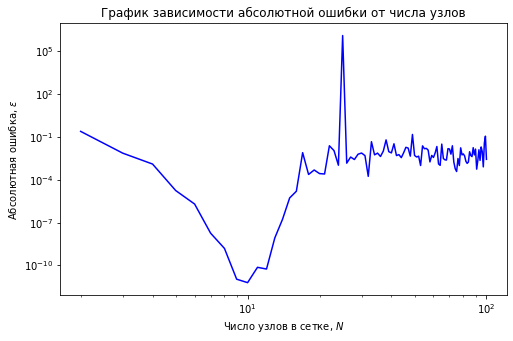

In [4]:
absolute_error_plot(np.pi/3, np.pi/2, 2, 100)

In [5]:
# 2. скрипт, который строит график зависимости числа обусловленности матрицы A системы с ростом ее размерности
def condition_number_plot(inf, sup):
    nodes = np.arange(inf, sup + 1)
    vs = [np.arange(node) for node in nodes]
    As = [np.fliplr(np.vander(v, v.size)).T for v in vs]
    conds = [la.cond(A) for A in As]
    plt.figure(figsize = (8, 5))
    plt.plot(nodes, conds, color = 'blue')
    plt.title("График зависимости числа обусловленности матрицы от количества узлов в сетке")
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel("Число узлов в сетке, $N$")
    plt.ylabel("Число обусловленности матрицы, $\epsilon$")

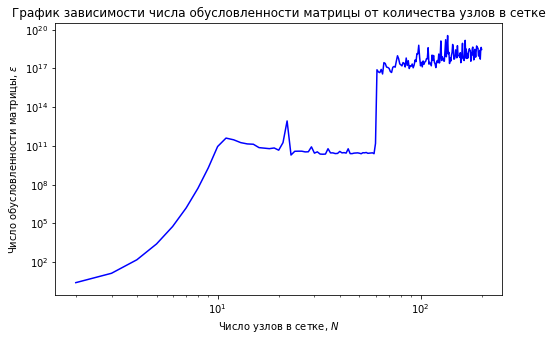

In [6]:
condition_number_plot(2, 200)

## Часть 2. Оценка порядка точности метода

Рассмотрим метод с порядком точности $p$. Тогда ошибка метода $\epsilon_h = Ch^p$, где $h$ - сеточный шаг. На сетке с двое меньшим шагом ошибка метода будет $\epsilon_{h/2} = C_1 \left(\frac{h}{2}\right)^p$. Если шаг h достаточно мелкий (ф-я меняется не очень сильно), то можно считать, что $C \approx C_1$. Тогда, исключив $C$ из первого равенства за счет второго, можно получить, что
$$
p = \log_2 \frac{\epsilon_h}{\epsilon_{h/2}}
$$

Задание:

3. написать скрипт, который численно будет определять порядок точности методов направленная разность и центральная разность. Построить график зависимости p от шага сетки в широком диапазоне значений h. На графике для h использовать логарифмический масштаб. Объяснить поведение графиков.

In [7]:
# направленная разность
def directed_difference(h, x_0):
    f_0 = np.sin(x_0)
    f_1 = np.sin(x_0 + h)
    diff = (f_1 - f_0) / h
    return diff

# центральная разность
def central_difference(h, x_0):
    f_1 = np.sin(x_0 - h)
    f_2 = np.sin(x_0 + h)
    diff = (f_2 - f_1) / (2 * h)
    return diff

In [8]:
def accuracy_order(h, x_0, method = "directed"):
    if method == "directed":
        error_h   = abs(directed_difference(h, x_0) - np.cos(x_0))
        error_h_2 = abs(directed_difference(h / 2, x_0) - np.cos(x_0))
    else:
        error_h   = abs(central_difference(h, x_0) - np.cos(x_0))
        error_h_2 = abs(central_difference(h / 2, x_0) - np.cos(x_0)) 
    return np.log2(error_h / error_h_2)

In [9]:
def accuracy_order_plot(x_0, inf, sup, method = "directed"):
    hs = np.logspace(inf, sup, 1000)
    ps = [accuracy_order(h, x_0, method) for h in hs]
    plt.figure(figsize = (8, 5))
    if method == "directed":
        plt.plot(hs, ps, color = 'blue', label = 'Направленная разность')
    else:
        plt.plot(hs, ps, color = 'blue', label = 'Центральная разность')

    plt.title("График зависимости порядка точности метода от сеточного шага")
    plt.xscale('log')
    plt.xlabel("Сеточный шаг, $h$")
    plt.ylabel("Порядок точности метода, $p$")

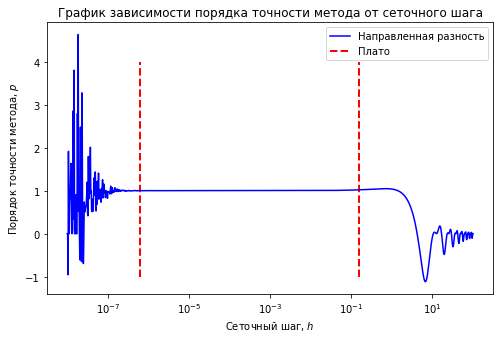

In [10]:
accuracy_order_plot(np.pi/3, -8, 2, "directed")
plt.vlines(x = [10**-6.2, 10**-0.8], ymin = -1, ymax = 4, colors = 'red', ls = '--', lw = 2, label = "Плато")
plt.legend();

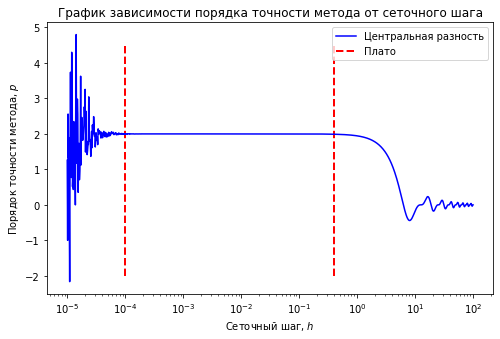

In [11]:
accuracy_order_plot(np.pi/3, -5, 2, "central")
plt.vlines(x = [10**-4, 10**-0.4], ymin = -2, ymax = 4.5, colors = 'red', ls = '--', lw = 2, label = "Плато")
plt.legend();

### Объяснение поведения графиков

Как нетрудно заметить, в графиках отчеливо прослеживается область значений $h$, при которых порядок точности соответствующего метода совпадает с теоретическим (1 и 2 соответственно), следовательно при таких значениях $h$ данная оценка порядка точности метода будет справедлива. При малых $h$ большую роль играет ошибка округления, которую мы, вообще говоря, не учитываем при вычислении $p$, из-за чего наблюдается сильный разброс в левых частях графиков. При больших же значениях $h$ большую силу имеет уже ошибка самого метода, поскольку в нем мы считаем $h$ достаточно малым для того, чтобы $C \approx C_1$, а потому и в правых частях графиков можно видеть большой разброс значений порядка точности метода.

## Использование sympy для дифференцирования ф-й

Пакет sympy очень удобный инструмент для символьных вычислений. Но не стоит с помощью него реализовывать какие-либо численные методы. Рассмотрим пример его использования для дифференцирования:

In [12]:
#пример взять отсюда https://maths-with-python.readthedocs.io/en/latest/07-sympy.html
#еще про sympy можно посмотреть здесь http://www.asmeurer.com/sympy_doc/dev-py3k/tutorial/tutorial.ru.html
import sympy as sp
import numpy as np

x = sp.Symbol('x')

expression = x**2*sp.sin(sp.log(x))
print('Первая производная', sp.diff(expression, x))
print('Вторая производная', sp.diff(expression, x, 2))
print('Третья производная', sp.diff(expression, x, 3))

expr2 = sp.sin(x)
expr2 = sp.diff(expr2, x, 2)
expr2.subs(x, np.pi/2) #подстваляем значение и вычисляем символьное выражение

Первая производная 2*x*sin(log(x)) + x*cos(log(x))
Вторая производная sin(log(x)) + 3*cos(log(x))
Третья производная (-3*sin(log(x)) + cos(log(x)))/x


-1.00000000000000